## LEFT OFF HERE:

- dummy classifier ROC curve
- PCA?
- SVG?
- ROC curves

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, plot_roc_curve, roc_curve
from sklearn.dummy import DummyClassifier

In [119]:
df = pd.read_csv('terry-stops-engineered', index_col=0)
df.head()

,Subject_Age_Group,Subject_ID,Terry_Stop_ID,Stop_Resolution,Weapon_Type,Officer_ID,Officer_YOB,Officer_Gender,Subject_Perceived_Gender,Reported_Date,Arrest_Flag,Frisk_Flag,Reported_TOD,Young_Officer,Late_Night,Officer_White,Subject_Perceived_White
892,18 - 25,4.0,13435,GO Report,None,1559,1985.0,M,Female,2015-08-07,N,N,21:45:00,0,0,1,0
893,-,5.0,32980,Street Check,None,2153,1992.0,M,Male,2017-11-12,N,N,01:45:00,1,1,1,0
894,46 - 55,6.0,39041,GO Report,None,653,1961.0,M,Male,2018-03-18,N,Y,21:49:00,0,0,1,0
895,46 - 55,13.0,40227,Arrest with GO or Supplemental,None,1701,1978.0,M,Female,2018-05-15,Y,N,07:53:00,0,0,1,1
896,26 - 35,14.0,15894,GO Report,None,1465,1983.0,M,Male,2015-10-30,N,N,11:31:00,0,0,0,1


## Convert Target Variable to binary encoding

In [120]:
df['Arrest_Flag'] = df['Arrest_Flag'].map({'Y':1, 'N':0})

In [121]:
df.head()

,Subject_Age_Group,Subject_ID,Terry_Stop_ID,Stop_Resolution,Weapon_Type,Officer_ID,Officer_YOB,Officer_Gender,Subject_Perceived_Gender,Reported_Date,Arrest_Flag,Frisk_Flag,Reported_TOD,Young_Officer,Late_Night,Officer_White,Subject_Perceived_White
892,18 - 25,4.0,13435,GO Report,None,1559,1985.0,M,Female,2015-08-07,0,N,21:45:00,0,0,1,0
893,-,5.0,32980,Street Check,None,2153,1992.0,M,Male,2017-11-12,0,N,01:45:00,1,1,1,0
894,46 - 55,6.0,39041,GO Report,None,653,1961.0,M,Male,2018-03-18,0,Y,21:49:00,0,0,1,0
895,46 - 55,13.0,40227,Arrest with GO or Supplemental,None,1701,1978.0,M,Female,2018-05-15,1,N,07:53:00,0,0,1,1
896,26 - 35,14.0,15894,GO Report,None,1465,1983.0,M,Male,2015-10-30,0,N,11:31:00,0,0,0,1


# Preprocessing

removing some variables that i might play with later

In [122]:
# Features matrix
df.drop(['Subject_ID', 'Terry_Stop_ID', 'Officer_ID', 'Officer_YOB',
             'Reported_Date', 'Stop_Resolution', 'Reported_TOD'], axis=1, inplace=True)

# Target Variable
y = df['Arrest_Flag']

In [123]:
X = df.drop('Arrest_Flag', axis=1)

# List of model features
feature_cols = X.columns

In [124]:
print(len(feature_cols))
feature_cols

9


Index(['Subject_Age_Group', 'Weapon_Type', 'Officer_Gender',
       'Subject_Perceived_Gender', 'Frisk_Flag', 'Young_Officer', 'Late_Night',
       'Officer_White', 'Subject_Perceived_White'],
      dtype='object')

## One-Hot-Encoding Categorical Data

In [126]:
# Get dummy variables for categorical data
one_hot_df = pd.get_dummies(X, columns=['Subject_Age_Group', 'Weapon_Type', 'Officer_Gender', 'Subject_Perceived_Gender', 'Frisk_Flag'])
one_hot_df.head()

,Young_Officer,Late_Night,Officer_White,Subject_Perceived_White,Subject_Age_Group_-,Subject_Age_Group_1 - 17,Subject_Age_Group_18 - 25,Subject_Age_Group_26 - 35,Subject_Age_Group_36 - 45,Subject_Age_Group_46 - 55,...,Weapon_Type_None,Weapon_Type_Other,Officer_Gender_F,Officer_Gender_M,Subject_Perceived_Gender_Female,Subject_Perceived_Gender_Male,Subject_Perceived_Gender_Unable to Determine,Frisk_Flag_-,Frisk_Flag_N,Frisk_Flag_Y
892,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,1,0
893,1,1,1,0,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
894,0,0,1,0,0,0,0,0,0,1,...,1,0,0,1,0,1,0,0,0,1
895,0,0,1,1,0,0,0,0,0,1,...,1,0,0,1,1,0,0,0,1,0
896,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0


In [127]:
one_hot_df.shape

(25095, 24)

In [128]:
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(one_hot_df, y, random_state=1)

## Normalize Data

In [129]:
# Instantiate Scaler
scaler = StandardScaler()

# Transform training/test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.fit_transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=one_hot_df.columns)
scaled_df_train.head()

,Young_Officer,Late_Night,Officer_White,Subject_Perceived_White,Subject_Age_Group_-,Subject_Age_Group_1 - 17,Subject_Age_Group_18 - 25,Subject_Age_Group_26 - 35,Subject_Age_Group_36 - 45,Subject_Age_Group_46 - 55,...,Weapon_Type_None,Weapon_Type_Other,Officer_Gender_F,Officer_Gender_M,Subject_Perceived_Gender_Female,Subject_Perceived_Gender_Male,Subject_Perceived_Gender_Unable to Determine,Frisk_Flag_-,Frisk_Flag_N,Frisk_Flag_Y
0,-0.380382,-0.683005,0.520661,1.003993,-0.176723,-0.235504,1.873837,-0.696762,-0.495247,-0.381479,...,0.242338,-0.040618,-0.355052,0.355052,-0.513068,0.536457,-0.123777,-0.11341,0.544582,-0.524945
1,-0.380382,1.464119,-1.920635,1.003993,-0.176723,-0.235504,-0.533664,-0.696762,2.019196,-0.381479,...,0.242338,-0.040618,-0.355052,0.355052,-0.513068,0.536457,-0.123777,-0.11341,0.544582,-0.524945
2,-0.380382,1.464119,0.520661,-0.996023,-0.176723,-0.235504,-0.533664,1.435210,-0.495247,-0.381479,...,0.242338,-0.040618,-0.355052,0.355052,-0.513068,0.536457,-0.123777,-0.11341,0.544582,-0.524945
3,2.628937,-0.683005,0.520661,1.003993,-0.176723,-0.235504,-0.533664,-0.696762,2.019196,-0.381479,...,0.242338,-0.040618,-0.355052,0.355052,1.949058,-1.864081,-0.123777,-0.11341,0.544582,-0.524945
4,-0.380382,-0.683005,0.520661,1.003993,-0.176723,-0.235504,-0.533664,-0.696762,-0.495247,2.621374,...,0.242338,-0.040618,-0.355052,0.355052,-0.513068,0.536457,-0.123777,-0.11341,0.544582,-0.524945


# Modeling

# 0. Dummy Classifier

In [74]:
# instantiate classifier, fit model, make predict
base = DummyClassifier()
base.fit(X_train, y_train)
base_y_hat_pred = base.predict(X_train)
base_y_pred = base.predict(X_test)

# print F1 Score
print('Train F1 Score: {}'.format(round(f1_score(y_train, base_y_hat_pred),3)))
print('Test F1 Score:  {}'.format(round(f1_score(y_test, base_y_pred),3)))


Train F1 Score: 0.23
Test F1 Score:  0.219


In [152]:
# 'How often were positive predictions correct?'
print("Precision Score: {}".format(round(precision_score(y_test, base_y_pred), 3)))

# How sensitive is the model ('How many actual positives were identified?')
print("Recall Score:    {}".format(round(recall_score(y_test, base_y_pred), 3))) 

# 'How often is the classifier correct?'
print("Accuracy Score:  {}".format(round(accuracy_score(y_test, base_y_pred), 3)))


Precision Score: 0.22
Recall Score:    0.218
Accuracy Score:  0.642


### Confusion Matrix - Dummy Classifier

In [130]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [38]:
base_cm = confusion_matrix(y_test, base_y_pred)
base_classes = ['No Arrest', 'Arrest']


Confusion Matrix, without normalization
[[3734 1095]
 [1097  348]]


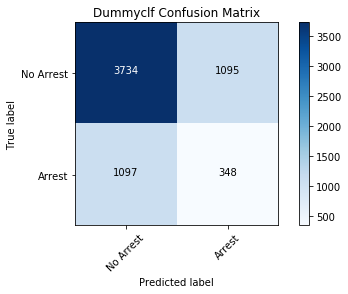

In [153]:
import itertools
plot_confusion_matrix(base_cm, base_classes, normalize=False, title='Dummyclf Confusion Matrix', cmap=plt.cm.Blues)

In [172]:
# save confusion matrix and slice into four pieces
base_confusion = confusion_matrix(y_test, y_pred_class)
TP = base_confusion[1, 1]
TN = base_confusion[0, 0]
FP = base_confusion[0, 1]
FN = base_confusion[1, 0]

In [173]:
print('TP = {}'.format(TP))
print('TN = {}'.format(TN))
print('FP = {}'.format(FP))
print('FN = {}'.format(FN))

TP = 22
TN = 4807
FP = 22
FN = 1423


In [65]:
# Confirm predicted labels are correct
sum(base_y_pred) == 348+1095

True

In [67]:
# Confirm true labels are correct
y_test.value_counts()

0    4829
1    1445
Name: Arrest_Flag, dtype: int64

### ROC Curve - Dummy Classifier

In [68]:
base_y_pred_prob = base.predict_proba(X_test)[:,1]

In [150]:
base_y_pred_prob.shape

(6274,)

In [151]:
y_test.shape

(6274,)

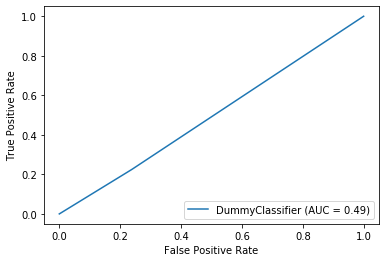

In [82]:
plot_roc_curve(base, y_test, base_y_pred_prob);

# 1. Logistic Regression

In [139]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test, sample_weight=None)

0.7696844118584635

In [44]:
log_reg_dict = dict(zip(list(X_train.columns), list(log_reg.coef_[0])))

In [45]:
log_reg_dict

{'Young_Officer': 0.3506184847658571,
 'Late_Night': 0.04034512693332121,
 'Officer_White': 0.10066977823575489,
 'Subject_Perceived_White': -0.18017155105950333,
 'Subject_Age_Group_-': -0.31467543827740097,
 'Subject_Age_Group_1 - 17': -0.046814299235908914,
 'Subject_Age_Group_18 - 25': 0.11636161857377154,
 'Subject_Age_Group_26 - 35': 0.1697762094818462,
 'Subject_Age_Group_36 - 45': 0.14363358080890581,
 'Subject_Age_Group_46 - 55': -0.09700652733224084,
 'Subject_Age_Group_56 and Above': 0.02133412577109484,
 'Weapon_Type_Club, Blackjack, Brass Knuckles': -0.07146914800310195,
 'Weapon_Type_Firearm': 0.3516012737285775,
 'Weapon_Type_Lethal Cutting Instrument': 0.24901080917440965,
 'Weapon_Type_None': -0.24945902947813095,
 'Weapon_Type_Other': -0.2870746356313388,
 'Officer_Gender_F': -0.02846490728494505,
 'Officer_Gender_M': 0.021074177075412256,
 'Subject_Perceived_Gender_Female': 0.14024323315089787,
 'Subject_Perceived_Gender_Male': 0.05837354550768892,
 'Subject_Perceive

In [46]:
# Make predictions for test set
y_pred_class = log_reg.predict(X_test)


### Classification Accuracy

In [47]:
accuracy_score(y_test, y_pred_class)

0.7696844118584635

In [48]:
y_test.value_counts()

0    4829
1    1445
Name: Arrest_Flag, dtype: int64

### Calculate null accuracy

In [49]:
p_ones = y_test.mean()
p_ones

0.2303155881415365

In [50]:
p_zeros = 1-y_test.mean()
p_zeros

0.7696844118584635

In [51]:
max(p_ones, p_zeros)

0.7696844118584635

### Confusion Matrix - Logistic Regression

In [52]:
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[4807,   22],
       [1423,   22]])

In [177]:
classes = ['No Arrest', 'Arrest']

Confusion Matrix, without normalization
[[4790   39]
 [1400   45]]


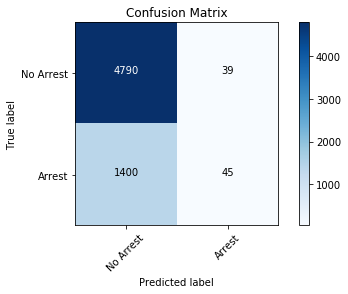

In [75]:
import itertools
plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues)

In [77]:
# save confusion matrix and slice into four pieces
confusion = confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

Many, many false negatives (model predicted 'No Arrest' but the terry stop ended in an arrest).

Perhaps I need to adjust threshold? Parameter tuning?

In [79]:
print('TP = {}'.format(TP))
print('TN = {}'.format(TN))
print('FP = {}'.format(FP))
print('FN = {}'.format(FN))

TP = 45
TN = 4790
FP = 39
FN = 1400


## Evaluation Metrics from Confusion Matrix

#### Classification Accuracy

In [87]:
f1 = 2*(precision_score(y_test, y_pred_class)*recall_score(y_test, y_pred_class))/(precision_score(y_test, y_pred_class)+recall_score(y_test, y_pred_class))

# 'How often were positive predictions correct?'
print("Precision Score: {}".format(round(precision_score(y_test, y_pred_class), 3)))

# How sensitive is the model ('How many actual positives were identified?')
print("Recall Score:    {}".format(round(recall_score(y_test, y_pred_class), 3))) 

# 'How often is the classifier correct?'
print("Accuracy Score:  {}".format(round(accuracy_score(y_test, y_pred_class), 3)))

# Super-low F1 score (almost 0)
print("F1 Score:        {}".format(round(f1, 3)))

Precision Score: 0.536
Recall Score:    0.031
Accuracy Score:  0.771
F1 Score:        0.059


## ROC Curve for Logistic Regression?

In [140]:
base_y_pred_prob = base.predict_proba(X_test)[:,1]

# 2. Fit a KNN Model

In [87]:
# Instantiate KNClassifier
KNNclf = KNeighborsClassifier()

# Fit the classifier
KNNclf.fit(scaled_data_train, y_train)

# Predict on the test set
KNN_test_predictions = KNNclf.predict(scaled_data_test)

## Evaluation

In [174]:
KNNcm = confusion_matrix(y_test, KNN_test_predictions)
KNNcm

array([[4554,  275],
       [1275,  170]])

Confusion Matrix, without normalization
[[4554  275]
 [1275  170]]


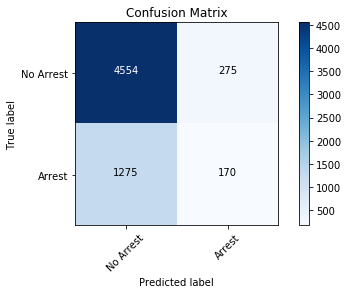

In [178]:
plot_confusion_matrix(KNNcm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues)

In [179]:
# save confusion matrix and slice into four pieces

TP = KNNcm[1, 1]
TN = KNNcm[0, 0]
FP = KNNcm[0, 1]
FN = KNNcm[1, 0]

In [180]:
print('TP = {}'.format(TP))
print('TN = {}'.format(TN))
print('FP = {}'.format(FP))
print('FN = {}'.format(FN))

TP = 170
TN = 4554
FP = 275
FN = 1275


In [175]:
# Printing evaluation metrics
def print_metrics(labels, preds):
    precis = precision_score(labels, preds)
    recall = recall_score(labels, preds)
    accura = accuracy_score(labels, preds)
    f1     = f1_score(labels, preds)
    
    print("Precision Score: {}".format(round(precis, 3)))
    print("Recall Score:    {}".format(round(recall, 3)))
    print("Accuracy Score:  {}".format(round(accura, 3)))
    print("F1 Score:        {}".format(round(f1, 3)))
    
print_metrics(y_test, KNN_test_predictions)

Precision Score: 0.382
Recall Score:    0.118
Accuracy Score:  0.753
F1 Score:        0.18


## Find Best Value for k

In [89]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [90]:
find_best_k(X_train, y_train, X_test, y_test)

Best Value for k: 1
F1-Score: 0.2387290682696436


#### Best model is a super over-fit one?


In [110]:
# store the predicted probabilities for class 1
KNN_y_pred_prob = KNNclf.predict_proba(X_test)[:, 1]

# plot the ROC cure
fpr, tpr, thresholds = roc_curve(y_test, KNN_y_pred_prob, pos_label=0)

In [138]:
np.bincount(KNN_y_pred_prob)

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

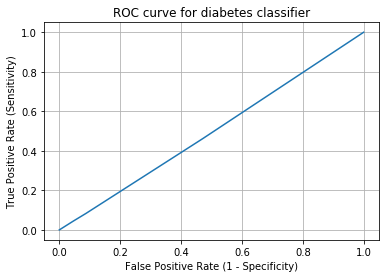

In [111]:
plt.plot(fpr, tpr)

plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [109]:
tpr

array([0.        , 0.04567474, 0.08719723, 0.47128028, 1.        ])

# 3. Train a Decision Tree

In [155]:
# Create a classifier instance and fit it on the traiing data
DCclf = DecisionTreeClassifier(criterion='entropy')
DCclf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Can't use graphviz to plot decision tree

In [122]:
# DC_test_predictions = DCclf.predict(X_train)

# print('Accuracy: {}'.format(accuracy_score(y_test, DC_test_predictions)))

In [156]:
DC_test_predictions = DCclf.predict(X_test)

In [162]:
print_metrics(y_test, DC_test_predictions)

Precision Score: 0.398
Recall Score:    0.05
Accuracy Score:  0.764
F1 Score:        0.089


In [163]:
accuracy_score(y_test, DC_test_predictions)

0.763787057698438

### ???

[0.7713090245633648, 0.7713090245633648, 0.7705914643538242, 0.7711094879152183, 0.7707507316290835, 0.768399959349529, 0.7681607249757446, 0.7668060162697159, 0.7667659533250021]


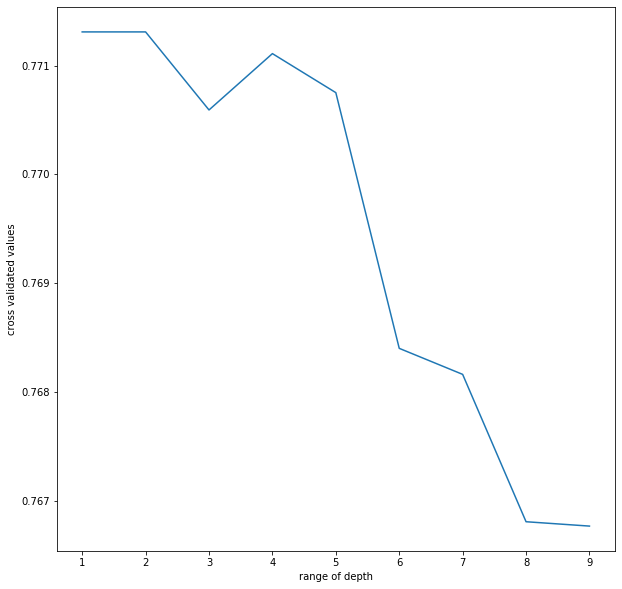

In [93]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(DCclf, one_hot_df, y, cv = 10)
score.mean()
depth_range = range(1,10)
val = []
for depth in depth_range:
    DCclf = DecisionTreeClassifier(max_depth = depth)
    depth_score = cross_val_score(DCclf, one_hot_df, y, cv = 10)
    val.append(depth_score.mean())
print(val)
plt.figure(figsize = (10,10))
plt.plot(depth_range, val)
plt.xlabel('range of depth')
plt.ylabel('cross validated values')
plt.show()

# 4. XGBoost

In [164]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [181]:
# Instantiate XGBClassifier
XGBclf = XGBClassifier()

# Fit XGBClassifier
XGBclf.fit(X_train, y_train)

# Predict on training and test sets
training_preds = XGBclf.predict(X_train)
test_preds = XGBclf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
training_precision = precision_score(y_train, training_preds)
training_recall = recall_score(y_train, training_preds)
training_f1 = f1_score(y_train, training_preds)

test_accuracy = accuracy_score(y_test, test_preds)
test_accuracy = accuracy_score(y_test, test_preds)
test_accuracy = accuracy_score(y_test, test_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy:   {:.4}%'.format(training_accuracy * 100))
print('Training Precision:   {:.4}%'.format(training_precision * 100))
print('Training Recall:   {:.4}%'.format(training_recall * 100))
print('Training F1:   {:.4}%'.format(training_f1 * 100))

print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))


Training Accuracy:   77.45%
Training Precision:   60.52%
Training Recall:   3.284%
Training F1:   6.229%
Validation accuracy: 77.08%


In [167]:
y_test.shape

(6274,)

In [171]:
training_preds.shape

(18821,)

In [166]:
print_metrics(y_test, training_preds)

ValueError: Found input variables with inconsistent numbers of samples: [6274, 18821]

In [183]:
# Construct a parameter grid for feeding into GridSearch
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [184]:
grid_clf = GridSearchCV(XGBclf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

GStraining_preds = grid_clf.predict(X_train)
GStest_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, GStraining_preds)
test_accuracy = accuracy_score(y_test, GStest_preds)

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 2
n_estimators: 100
subsample: 0.7


In [186]:
# Accuracy of training and test sets
GStraining_accuracy = accuracy_score(y_train, GStraining_preds)
GStraining_precision = precision_score(y_train, GStraining_preds)
GStraining_recall = recall_score(y_train, GStraining_preds)
GStraining_f1 = f1_score(y_train, GStraining_preds)

print('Training Accuracy:   {:.4}%'.format(GStraining_accuracy * 100))
print('Training Precision:   {:.4}%'.format(GStraining_precision * 100))
print('Training Recall:   {:.4}%'.format(GStraining_recall * 100))
print('Training F1:   {:.4}%'.format(GStraining_f1 * 100))

print('')
print('Training Accuracy:   {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy:   77.78%
Training Precision:   62.84%
Training Recall:   6.381%
Training F1:   11.59%

Training Accuracy:   77.78%
Validation accuracy: 77.02%
